# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Import seaborn to draw a few visuals to understand the data
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_context("notebook", font_scale=1)
sb.set_style('whitegrid')

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45222,NaN,NaN,NaN,38.5479,13.2179,17,28,37,47,90
workclass,45222,7,Private,33307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,45222,16,HS-grad,14783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,45222,NaN,NaN,NaN,10.1185,2.55288,1,9,10,13,16
marital-status,45222,7,Married-civ-spouse,21055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,45222,14,Craft-repair,6020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,45222,6,Husband,18666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,45222,5,White,38903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,45222,2,Male,30527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,45222,NaN,NaN,NaN,1101.43,7506.43,0,0,0,0,99999


In [3]:
print data['workclass'].unique()
print data['education_level'].unique()
print data['marital-status'].unique()
print data['occupation'].unique()
print data['relationship'].unique()
print data['race'].unique()
print data['sex'].unique()
print data['native-country'].unique()


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

In [4]:
#Bins on age, capital-gain, capital-loss,hours-per-week
age_bin = [10,20,30,40,50,60,70,80,90,100]
data['age_bin'] = pd.cut(data['age'],age_bin)
hours_per_week_bin = [0,10,20,30,40,50,60,70,80,90,100]
data['hours-per-week-bin'] = pd.cut(data['hours-per-week'],hours_per_week_bin)
capital_gain_bin = [-1000,0,5000,25000,50000,75000,100000]
data['capital-gain-bin'] = pd.cut(data['capital-gain'],capital_gain_bin)
capital_loss_bin = [-1000,0,1000,2000,3000,4000,5000]
data['capital-loss-bin'] = pd.cut(data['capital-loss'],capital_loss_bin)

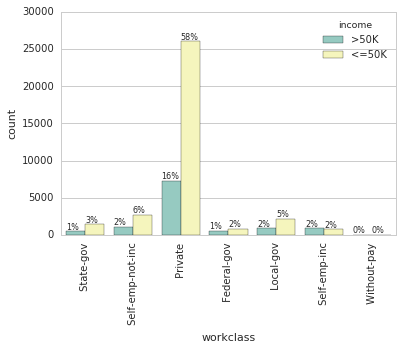

In [5]:
n_records = len(data)
g = sb.countplot(x="workclass",hue="income", data=data,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x(), height+3, '%1.0f%%'%(height*100./n_records),horizontalalignment='left',verticalalignment='bottom',fontsize=8)

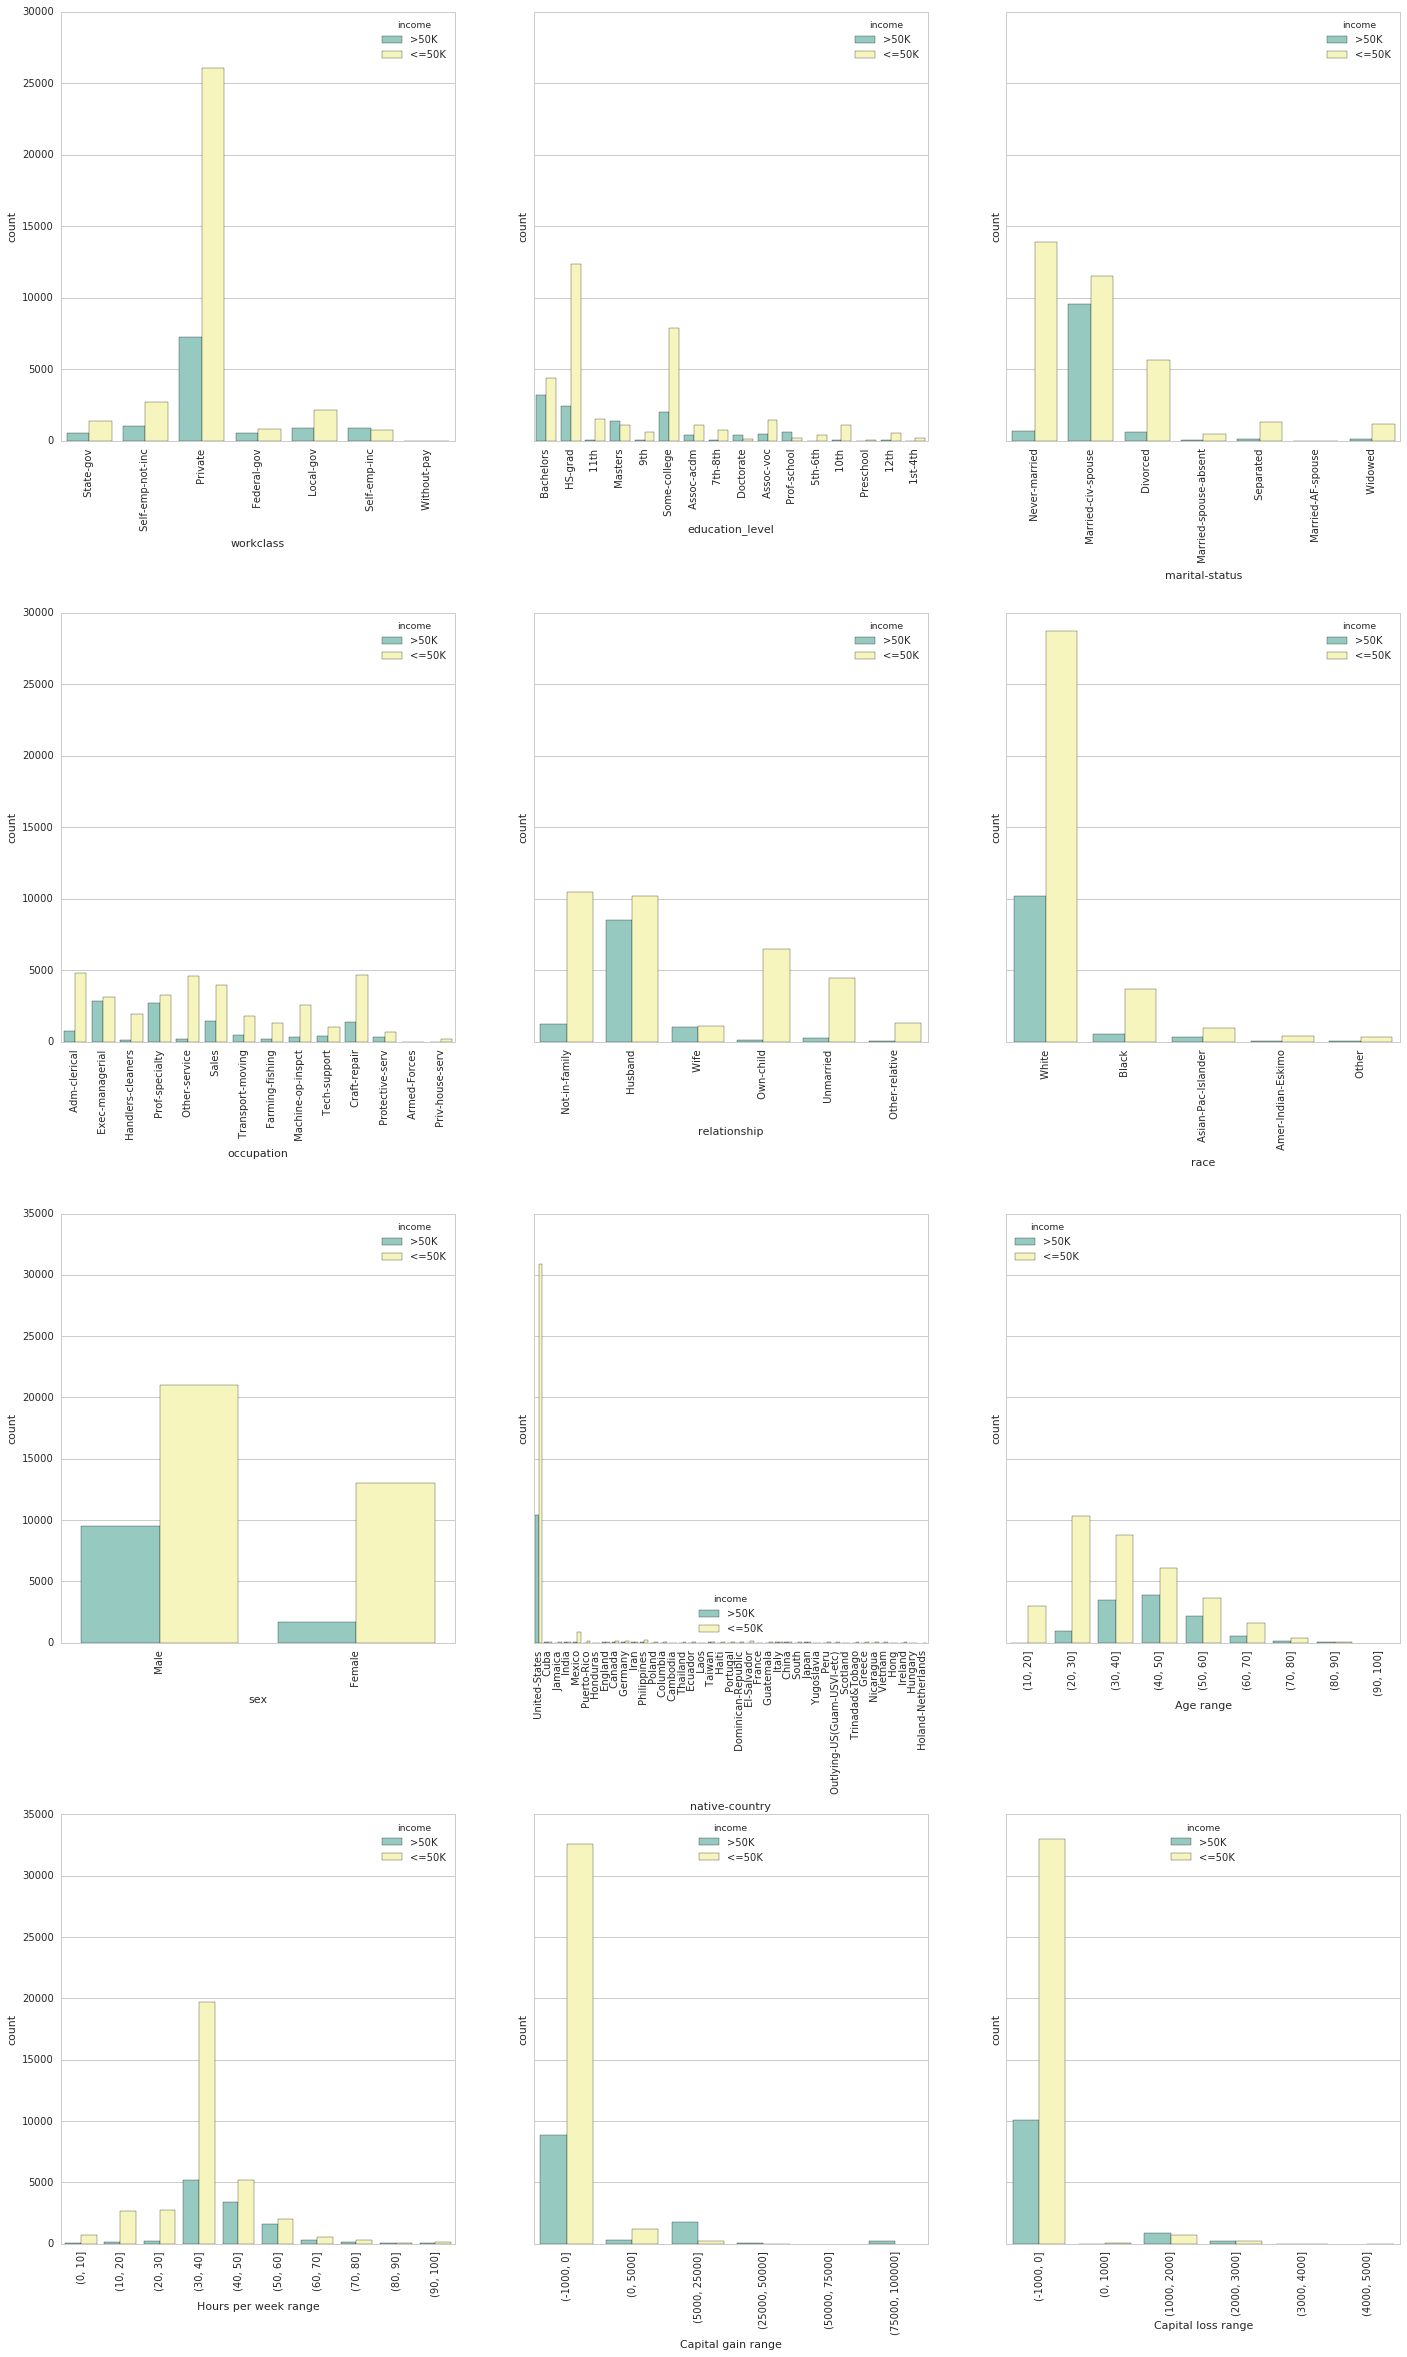

In [6]:
from matplotlib import gridspec
#fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5),sharey=True)
#gs = gridspec.GridSpec(2, 3,
#                       width_ratios=[1,1,1],
#                       height_ratios=[1,1]
#                       )
#axis1 = plt.subplot(gs[0])
#axis2 = plt.subplot(gs[1])
#axis3 = plt.subplot(gs[2])
#axis4 = plt.subplot(gs[3])
#axis5 = plt.subplot(gs[4])
#axis6 = plt.subplot(gs[5])

n_records = len(data)
fig, ((axis1, axis2, axis3), (axis4, axis5,axis6), (axis7, axis8,axis9), (axis10, axis11,axis12)) = plt.subplots(4, 3, sharey='row',figsize=(24,40),gridspec_kw={'hspace':0.4})

g = sb.countplot(x="workclass",hue="income", data=data,ax=axis1,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="education_level",hue="income", data=data,ax=axis2,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="marital-status",hue="income", data=data,ax=axis3,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="occupation",hue="income", data=data,ax=axis4,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="relationship",hue="income", data=data,ax=axis5,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sb.countplot(x="race",hue="income", data=data,ax=axis6,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="sex",hue="income", data=data,ax=axis7,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sb.countplot(x="native-country",hue="income", data=data,ax=axis8,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sb.countplot(x="age_bin",hue="income", data=data,ax=axis9,palette="Set3",hue_order=[">50K","<=50K"])
g.set_xlabel("Age range")
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="hours-per-week-bin",hue="income", data=data,ax=axis10,palette="Set3",hue_order=[">50K","<=50K"])
g.set_xlabel("Hours per week range")
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sb.countplot(x="capital-gain-bin",hue="income", data=data,ax=axis11,palette="Set3",hue_order=[">50K","<=50K"])
g.set_xlabel("Capital gain range")
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sb.countplot(x="capital-loss-bin",hue="income", data=data,ax=axis12,palette="Set3",hue_order=[">50K","<=50K"])
g.set_xlabel("Capital loss range")
for item in g.get_xticklabels():
    item.set_rotation(90)


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [7]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/float(n_records))*100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


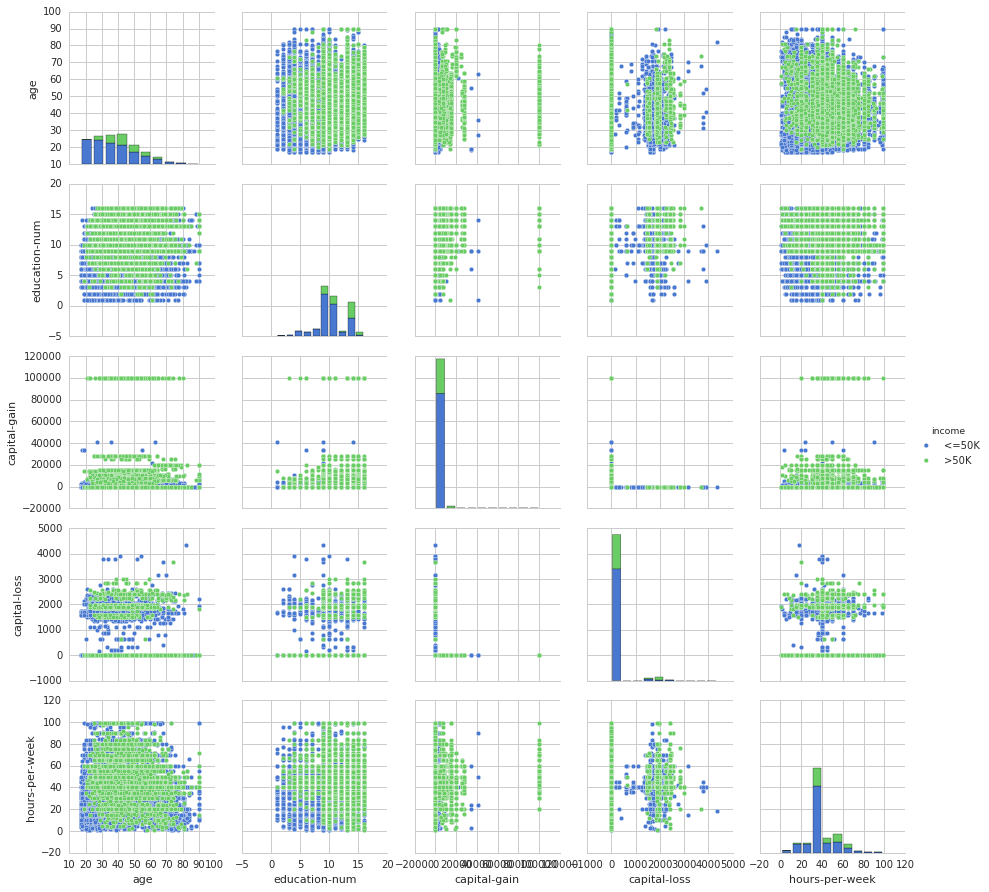

In [8]:
sb.pairplot(data.drop(['age_bin', 'hours-per-week-bin', 'capital-gain-bin','capital-loss-bin'], axis=1),hue="income", dropna=True,palette="muted")

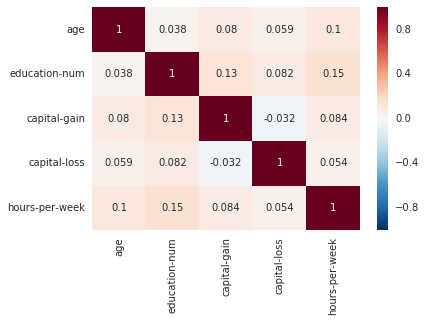

In [9]:
sb.heatmap(data.drop(['age_bin', 'hours-per-week-bin', 'capital-gain-bin','capital-loss-bin'], axis=1).corr(),annot=True)

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

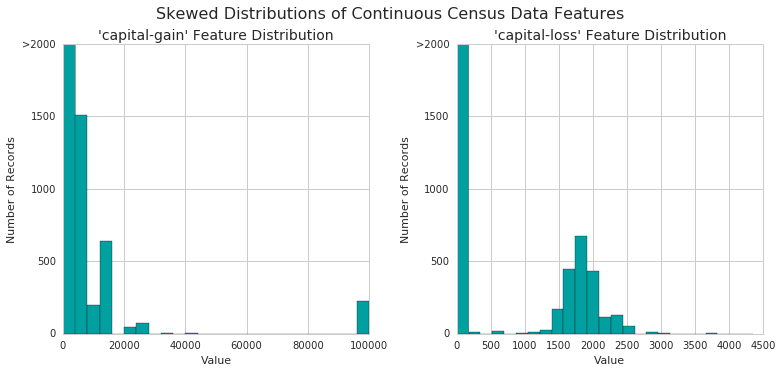

In [10]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop(['income','age_bin', 'hours-per-week-bin', 'capital-gain-bin','capital-loss-bin'], axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

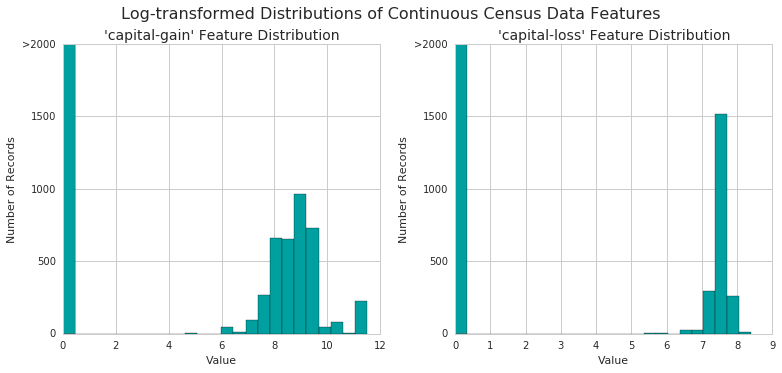

In [11]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [12]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [13]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [14]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [15]:
# TODO: Calculate accuracy
accuracy = len(income[income == 1])/float(len(income))

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = (1 + 0.5**2)*(accuracy*1)/(((0.5**2)*accuracy) + 1)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **

*I am going with following Supervised learning models -    

**1. AdaBoost Classifier - **

* Application Use Case - One strong use case for Adaboost classifier is to classify if a loan will default. Lending companies can use this algorithim to figure out if to approve loan or not to approve.
   
   
* Strengths - AdaBoost is a powerful classification algorithm that has enjoyed practical success with applications in a wide variety of fields, such as biology, computer vision, and speech processing. Unlike other powerful classifiers, such as SVM, AdaBoost can achieve similar classification results with much less tweaking of parameters or settings (unless of course you choose to use SVM with AdaBoost). The user only needs to choose: (1) which weak classifier might work best to solve their given classification problem; (2) the number of boosting rounds that should be used during the training phase. The GRT enables a user to add several weak classifiers to the family of weak classifiers that should be used at each round of boosting. The AdaBoost algorithm will select the weak classifier that works best at that round of boosting.  
   
   
   * Weakness - AdaBoost can be sensitive to noisy data and outliers. Adaboost is also prone to overfitting.  
   
   
   * Why I choose this? Given that we have a good number of categorical features and we have translated all features to binary, I thought that ensemble based Adaboost will be a good algorithim to pick up. In addition our features didn't have much corelation with each other or with prediction, so thought that algorithim like k-nearest neighbor and Gaussian Naive Bayes will not work very well.  
   

**2. Logistic Regression - **  

* Application Use Case - Classifying sentiment of a review is one of the use cases that I am aware of for Logistic regresssion. Companies like Amazon use logistic regression to go through content of customer's review and do sentiment analysis based upon the texts in the review.
    
* Strengths - Logistic regression is simple and easy to understand. It's linear classifier works well in most of the situation.
    
* Weakness - Logistic regresssion requires a large amount of data to train. Also if relationships across features are very complex, logistic regression may not work very well.
    
* Why I choose - LR is easy to apply and a solid baseline to compare other more complex methods to. It is widely used in many industries (e.g., called the "standard industry workhorse" in the Mahout docs). Thus, it should be the first thing to start with when looking for an optimal classifier since a more complex model should at least beat LR. Of my three methods, it is the one with high bias and low variance.

**3. Gradient Boosting Classifier - **  


* Application Use Case - Use case for Gradient Boosting classifier remains the same as Adaboost. Gradient boosting has gained popularity specifically in the field of learning to rank. The commercial web search engines Yahoo and Yandex use variants of gradient boosting in their machine-learned ranking engines.
    
* Strengths -  As an ensemble method, GBC is a very robust classifier that can be applied easily with little preprocessing. It can capture very complex non-linear depenencies in the data. You can increase the number of boosting iterations of GBC as much as you want without danger of overfitting. Instead, it tends to improve classification performance more and more the longer you run it. Thus, you can use GBC to really get the most out of your data. 
    
* Weakness - GBM may take a long time to run. 
    
* Why I choose this - GBC allows to go to the limits of whats possible with the given dataset. Since there is not much corelation across our data, GBM has a good chance to find them with the given data. Also since the dataset is small, extensive experiments with hyperparameters are feasible. Given our situation, GBM is the low bias and high variance model I choose.  
    
    
    
    

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


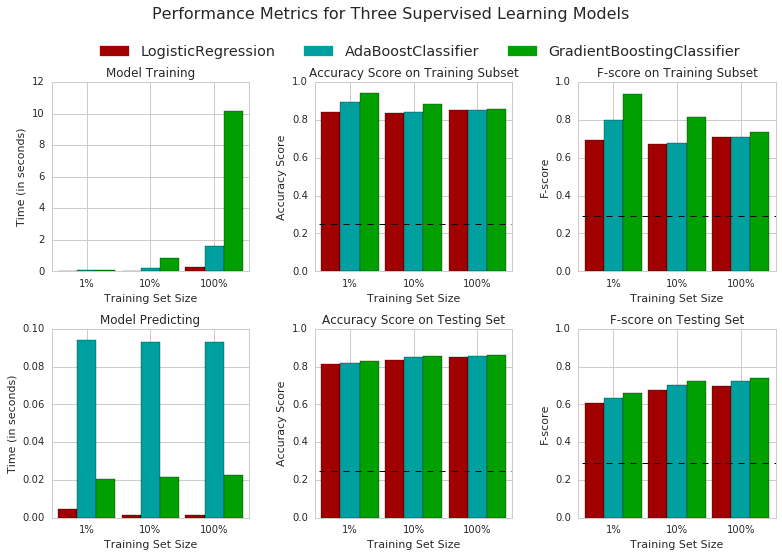

In [17]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


my_random_state=42

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=my_random_state)
clf_B = GradientBoostingClassifier(random_state=my_random_state)
clf_C = AdaBoostClassifier(random_state=my_random_state)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*len(X_train))
samples_10 = int(0.10*len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


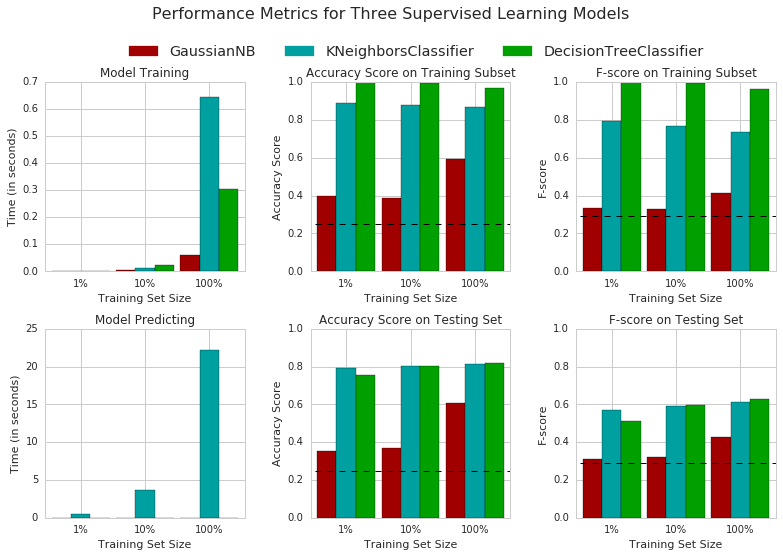

In [18]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

my_random_state=42

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = tree.DecisionTreeClassifier(random_state=my_random_state)
clf_C = KNeighborsClassifier(n_neighbors=3)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*len(X_train))
samples_10 = int(0.10*len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results1 = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results1[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results1[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results1, accuracy, fscore)

SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


/opt/anaconda/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


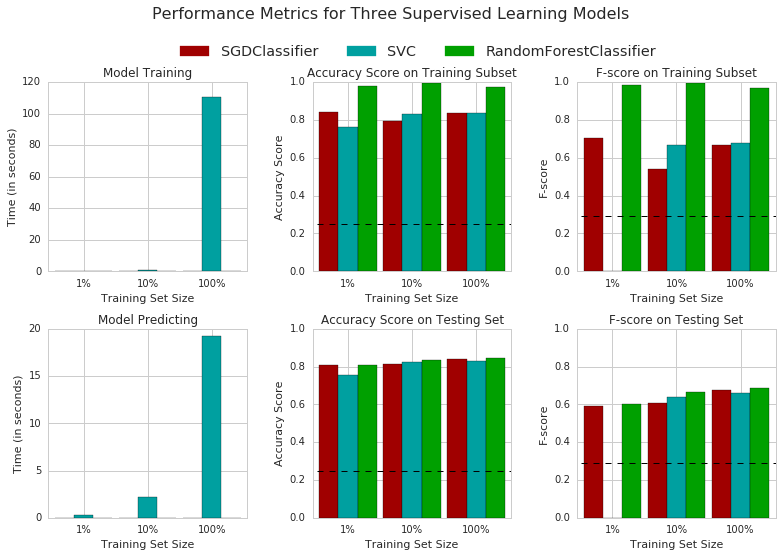

In [19]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

my_random_state=42

# TODO: Initialize the three models
clf_A = SGDClassifier(random_state=my_random_state)
clf_B = RandomForestClassifier(random_state=my_random_state)
clf_C = SVC(random_state=my_random_state)



# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*len(X_train))
samples_10 = int(0.10*len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results3 = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results3[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results3[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results3, accuracy, fscore)

## Compile the results into a single dataframe

In the section above - just out of curiousity, I used nine supervised models to run the prediction. In order to do deeper analysis of results, I am compiling results from all the models above into a single dataframe in the section below.


In [20]:
# This function takes a nested dictionary and flattens it
def flatten_dict(d):
    def items():
        for key, value in d.items():
            if isinstance(value, dict):
                for subkey, subvalue in flatten_dict(value).items():
                    yield str(key) + "." + str(subkey), subvalue
            else:
                yield key, value

    return dict(items())

In [21]:
#Merge results from all 3 tests into single dictionary and then flatten the dictionary
final_results = results.copy()
final_results.update(results1)
final_results.update(results3)
final_results = flatten_dict(final_results)

#Copy results into a dataframe for easier analysis of results
final_result_df = pd.DataFrame(columns=['model_name', 'iteration#'])
for key,value in final_results.items():
    key_split = key.split('.')
    final_result_df = final_result_df.append(pd.DataFrame([[key_split[0],key_split[1],value]],columns=['model_name', 'iteration#', key_split[2]] ))

final_result_df.set_index(['model_name'], inplace=True)
final_result_df.reset_index(inplace=True)

final_result_df = final_result_df.groupby(['model_name','iteration#']).mean()
final_result_df.reset_index(inplace=True)
final_result_df

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
0,AdaBoostClassifier,0,0.820785,0.893333,0.633010,0.801282,0.093769,0.093129
1,AdaBoostClassifier,1,0.849862,0.840000,0.701882,0.680147,0.092805,0.220783
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.092867,1.629228
3,DecisionTreeClassifier,0,0.755445,1.000000,0.509859,1.000000,0.002153,0.002023
4,DecisionTreeClassifier,1,0.802764,0.996667,0.596479,0.997191,0.002722,0.024246
5,DecisionTreeClassifier,2,0.819016,0.970000,0.628867,0.963855,0.003956,0.304130
6,GaussianNB,0,0.351797,0.400000,0.310134,0.333333,0.012382,0.001615
7,GaussianNB,1,0.367385,0.386667,0.320791,0.326287,0.010999,0.004802
8,GaussianNB,2,0.608292,0.593333,0.428113,0.412500,0.011629,0.059903
9,GradientBoostingClassifier,0,0.831399,0.940000,0.659967,0.937500,0.020529,0.087942


In [22]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['acc_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.022665,10.153372
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.092867,1.629228
17,LogisticRegression,2,0.848314,0.850000,0.699293,0.708955,0.001599,0.286089
20,RandomForestClassifier,2,0.843118,0.973333,0.684322,0.967262,0.029383,0.430855
23,SGDClassifier,2,0.840243,0.836667,0.673587,0.665584,0.001574,0.071879
26,SVC,2,0.830072,0.836667,0.659238,0.677966,19.243458,110.516835
5,DecisionTreeClassifier,2,0.819016,0.970000,0.628867,0.963855,0.003956,0.304130
14,KNeighborsClassifier,2,0.812272,0.866667,0.614421,0.734375,22.164401,0.644653
8,GaussianNB,2,0.608292,0.593333,0.428113,0.412500,0.011629,0.059903


In [23]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['f_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.022665,10.153372
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.092867,1.629228
17,LogisticRegression,2,0.848314,0.850000,0.699293,0.708955,0.001599,0.286089
20,RandomForestClassifier,2,0.843118,0.973333,0.684322,0.967262,0.029383,0.430855
23,SGDClassifier,2,0.840243,0.836667,0.673587,0.665584,0.001574,0.071879
26,SVC,2,0.830072,0.836667,0.659238,0.677966,19.243458,110.516835
5,DecisionTreeClassifier,2,0.819016,0.970000,0.628867,0.963855,0.003956,0.304130
14,KNeighborsClassifier,2,0.812272,0.866667,0.614421,0.734375,22.164401,0.644653
8,GaussianNB,2,0.608292,0.593333,0.428113,0.412500,0.011629,0.059903


## Results ##

*Looks like, I made a good choice with algorithim. The threee algorithim I selected performed the best.*

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

Best model to do the prediction was Gradient Boost classifier. Based on the results I received, Gradient Boost classifier provided best results (with respect to accruacy and F score).

On the flip side, Gradient Boost classifier took longest to train. But given the data volume, training time is still manageable.

Generally, Gradient Boost Classifier allows to go to the limits of what's possible with the given dataset. Since there is not much correlation across our data, Gradient Boost Classifier has a good chance to find them with the given data. Also since the dataset is small, extensive experiments with hyperparameters are feasible. Given our situation, it makes complete sense to choose low bias and high variance Gradient Boost Classifier.


Here are the results from all 3 models I selected -

In [24]:
final_result_df[final_result_df['model_name'] == 'GradientBoostingClassifier']

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
9,GradientBoostingClassifier,0,0.831399,0.940000,0.659967,0.937500,0.020529,0.087942
10,GradientBoostingClassifier,1,0.855943,0.883333,0.721604,0.813492,0.021543,0.812245
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.022665,10.153372


In [25]:
final_result_df[final_result_df['model_name'] == 'AdaBoostClassifier']

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
0,AdaBoostClassifier,0,0.820785,0.893333,0.633010,0.801282,0.093769,0.093129
1,AdaBoostClassifier,1,0.849862,0.840000,0.701882,0.680147,0.092805,0.220783
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.092867,1.629228


In [26]:
final_result_df[final_result_df['model_name'] == 'LogisticRegression']

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
15,LogisticRegression,0,0.810835,0.843333,0.608164,0.694444,0.004451,0.003910
16,LogisticRegression,1,0.836926,0.836667,0.674581,0.671642,0.001303,0.017000
17,LogisticRegression,2,0.848314,0.850000,0.699293,0.708955,0.001599,0.286089


### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

From the problem statement, I understood that you want to understand whether an individual makes more than 50k or not. Based on that, you will make decision whether you want to reach out that individul or not and how much to ask them. I thought that machine learning will be a good way to figure this out. Based upon the census data we have available, we can build a prediction model that can tell you whether indivdual makes 50k or not. If you have  those data available about an individual, you can feed the data to prediction model to figure out individual's income level.

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. Like other boosting methods, gradient boosting combines weak "learners" into a single strong learner in an iterative fashion. Gradient Boost classifier can keep learning from weak learners until model performance reaches to an optimum level.

For our scenario with a variety of categorical and numeric features, Gradient Boost classifier is a great fit. In each stage, it learns from the weak learner and uses it to reduce error for next stage.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

GradientBoostingClassifier trained on 36177 samples.
{'pred_time': 0.022305965423583984, 'f_test': 0.7395338561802719, 'train_time': 10.104659795761108, 'acc_train': 0.85666666666666669, 'acc_test': 0.86301824212271971, 'f_train': 0.73412698412698407}


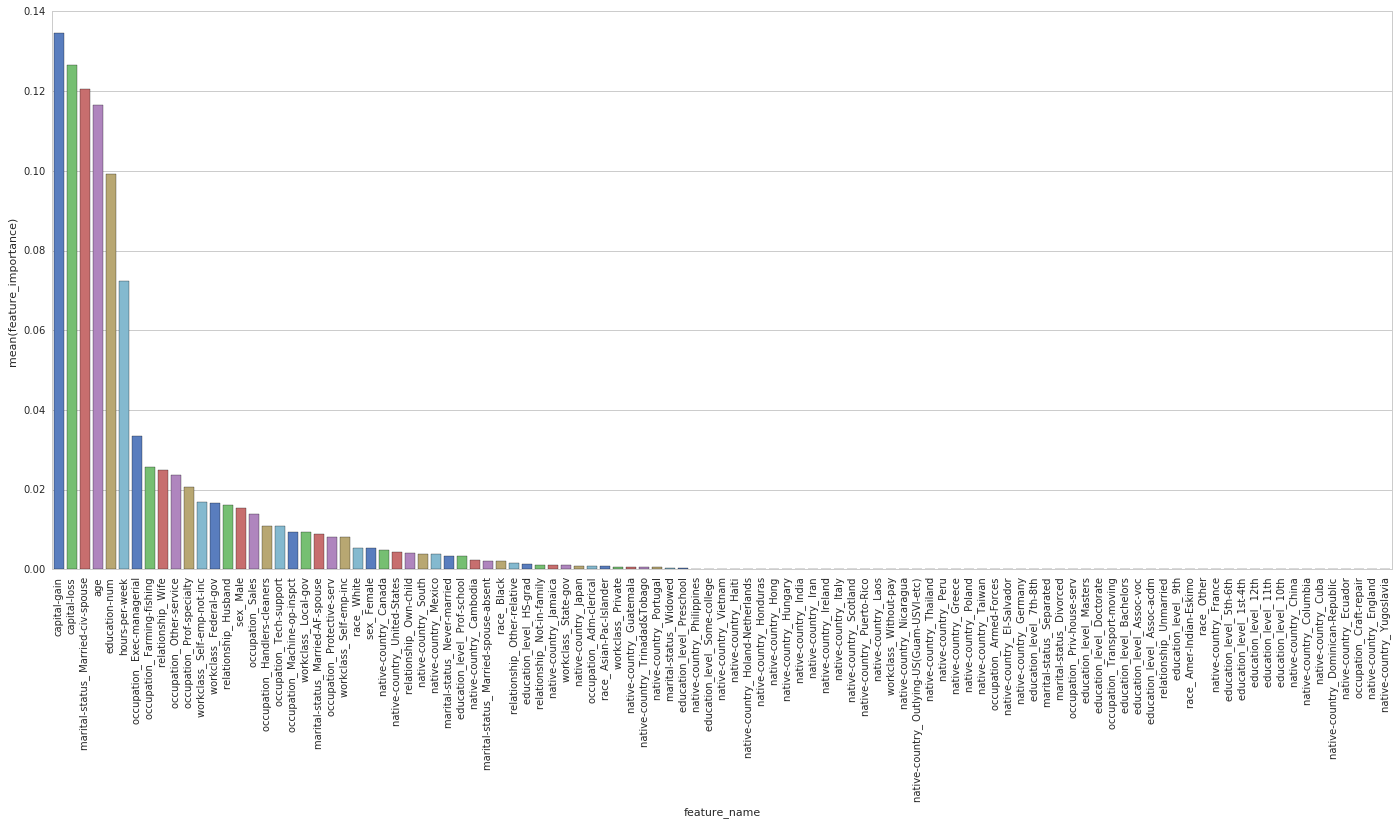

In [27]:
'''
GradientBoostingClassifier algorithim turned out to be best algorithim for this case. I am writing this section to
capture baseline results with GradientBoostingClassifier without tuning. Baseline results will be compared with the
results after tuning.

'''
my_random_state=42

# TODO: Initialize the three models

clf = GradientBoostingClassifier(random_state=my_random_state)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
sample_size = len(X_train)

GB_result = train_predict(clf, samples, X_train, y_train, X_test, y_test)

print GB_result

feature_importance_df = pd.DataFrame({'feature_name': features.columns, 'feature_importance': clf.feature_importances_})
feature_importance_df.sort_values(['feature_importance'],ascending=False,inplace=True)

fig,ax1 = plt.subplots(1, 1,figsize=(24,10),gridspec_kw={'hspace':0.4})

g = sb.barplot(x="feature_name",y="feature_importance",data=feature_importance_df,ax=ax1,palette="muted")
for item in g.get_xticklabels():
    item.set_rotation(90)


In [30]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score,accuracy_score,make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=my_random_state)

# TODO: Create the parameters list you wish to tune
# Multiple parameters were used for optimization. All the parameters that were used for optimization are listed here.
#parameters = {'n_estimators':range(50,141,10),'learning_rate':[0.05,0.1],'max_depth':range(3,16,2), 'min_samples_split':range(2,1001,200),
#                'min_samples_leaf':range(1,51,10)}
parameters = {'max_depth':[5],'min_samples_split':[2],'min_samples_leaf':[11],'n_estimators':[110],'learning_rate':[0.001,0.05,0.1,0.15] }

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
train_predictions = best_clf.predict(X_train)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, train_predictions))
print "Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_predictions, beta = 0.5))
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the training data: 0.8769
Final F-score on the training data: 0.7715
Final accuracy score on the testing data: 0.8690
Final F-score on the testing data: 0.7483


In [29]:
grid_fit.grid_scores_,grid_fit.best_params_,grid_fit.best_score_

([mean: 0.00000, std: 0.00000, params: {'min_samples_split': 2, 'n_estimators': 110, 'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 11},
  mean: 0.74936, std: 0.00388, params: {'min_samples_split': 2, 'n_estimators': 110, 'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 11},
  mean: 0.75645, std: 0.00475, params: {'min_samples_split': 2, 'n_estimators': 110, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 11},
  mean: 0.75323, std: 0.00475, params: {'min_samples_split': 2, 'n_estimators': 110, 'learning_rate': 0.15, 'max_depth': 5, 'min_samples_leaf': 11}],
 {'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 11,
  'min_samples_split': 2,
  'n_estimators': 110},
 0.75644746582061861)

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model|
| :------------: | :-----------------: | :---------------: | :-------------:| 
| Accuracy Score | 0.2478              |  0.8630           |   0.8690       |
| F-score        | 0.2917              |  0.7395           |   0.7483       |


**Answer: ** Scores with optimized model was slightly better than unoptimized model. But both optimized and unoptimized scores are way better than naive predictor benchmark.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

Here are the 5 most important features (in descending order of ranking) -

1. Capital Gain
2. Capital Loss
3. Marital status
4. Age
5. Education Num

Here are my reasons for selecting above features -

1. If you look into the charts in my data exploration area, you will find following -
    1. People who have capital gain or loss have very good chance that they will have good income.
    
    2. People with certain marital status are quite predictable with their income level
    
    3. People with Bachelors and Masters degree could be predicted well
    
    4. Also if you see the co-relation chart between capital gain/loss and eductation num/age, you will find pockets where majority of people are in one category of income. That makes these features weightage high. 

2. In addition, I ran clf.feature_importances_ above with gradient boosting classifier model. These 5 features constitute more than 60% of the importance. So, I went with them.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

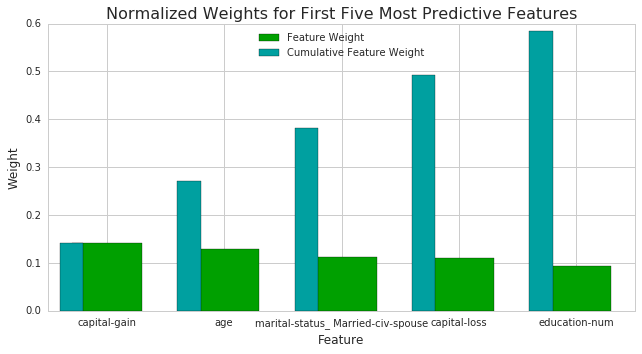

In [58]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = None

# TODO: Extract the feature importances
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

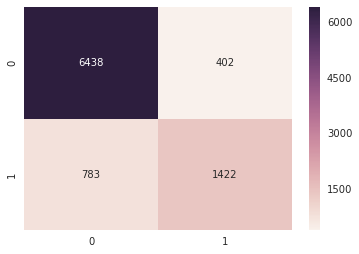

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

pred = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

Features are the same. Although, ranking of the features are different. New ranking is -

1. Capital-gain
2. Age
3. Marital-status
4. Capital-loss
5. Education Num

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [59]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8690
F-score on testing data: 0.7483

Final Model trained on reduced data
------
Accuracy on testing data: 0.8586
F-score on testing data: 0.7244


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

Accuracy goes down just a little bit (around a percentage point). If training time was an issue, we can consider using reduced data as training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.